# Pre-processing and visualization in Python

In this session, we'll teach you some basics on how to create nice-looking visualisations in Python. 

## A really quick refresher on data structures

Usually, when visualizing, we work with large datasets, which need to be stored in a specific data structure. Python has several built in, most importantly lists and dictionaries.

In [1]:
reaction_times = [713, 552, 473, 143, 638, 311, 668, 937, 621, 459]  # This is a list of reaction times
print(reaction_times[3])  # This retrieves the 4th element (index 3)

143


In [2]:
# This is a dictionary with participant information:
participant = {
    'first_name': 'Marcus',
    'last_name': 'Mcguire',
    'age': 20
}
print(participant['last_name'])  # This retrieves the value belonging to the 'last_name' key

Mcguire


How about... a list of lists? For instance, when you have multiple series of reaction times:

In [3]:
participants = ['Rhonda', 'Elizabeth', 'Tara']
reaction_times = [
    [713, 552, 473, 143, 638, 311, 668, 937, 621, 459],    # 0
    [287, 750, 411, 410, 351, 1040, 1124, 891, 924, 664],  # 1
    [342, 1063, 131, 485, 480, 159, 60, 389, 375, 653]     # 2
]
print(reaction_times[1][4])  # This retrieves the 5th (index 4) reaction time from the 2nd participant (index 1)

351


Or, perhaps, a list of dictionaries?

In [4]:
students = [
    {'first_name': 'Marcus', 'last_name': 'Mcguire', 'grade': 3.3},
    {'first_name': 'Kristin', 'last_name': 'Cantu', 'grade': 2.7},
    {'first_name': 'Adam', 'last_name': 'Mendez', 'grade': 3.7},
    {'first_name': 'Kimberly', 'last_name': 'Wolf', 'grade': 2.7},
    {'first_name': 'Judith', 'last_name': 'Johnson', 'grade': 3.0}
]
print(students[0]['grade'])  # This retrieves the grade of the 1st student (index 0)

3.3


### But wait, there's a package for that!

As you will know, or come to find out, Python has a great deal of packages to make your life easier! In particular, when working with data, you will want to use one of the following: `numpy` for working with matrices or N-dimensional arrays where all values are of the same type, and `pandas` for working with tabular data.

For instance:

In [5]:
import numpy as np

reaction_times = np.array(reaction_times)
print(reaction_times)  # This is now a numpy array!

[[ 713  552  473  143  638  311  668  937  621  459]
 [ 287  750  411  410  351 1040 1124  891  924  664]
 [ 342 1063  131  485  480  159   60  389  375  653]]


Alternatively, with tabular data:

In [6]:
import pandas as pd

students = pd.DataFrame(students)
print(students)  # This is now a pandas DataFrame!

  first_name last_name  grade
0     Marcus   Mcguire    3.3
1    Kristin     Cantu    2.7
2       Adam    Mendez    3.7
3   Kimberly      Wolf    2.7
4     Judith   Johnson    3.0


## Data looks better in color!

So let's turn our arrays and tables into plots! We will be introducing three plotting packages:

- `matplotlib` -- forms the basis of (most) plotting in Python, and also acts as the foundation for our other two packages.
- `seaborn` -- a more data-centric and simplified plotting package, for easy and beautiful plots!
- `plotnine`  -- a `ggplot` clone for Python; very data-centric, but has a slightly steeper learning curve than `seaborn`. 

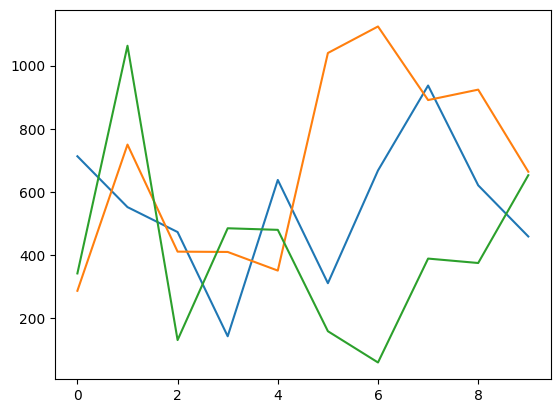

In [9]:
from matplotlib import pyplot as plt

plt.plot(reaction_times.T)  # The T is for Transpose!
plt.show()

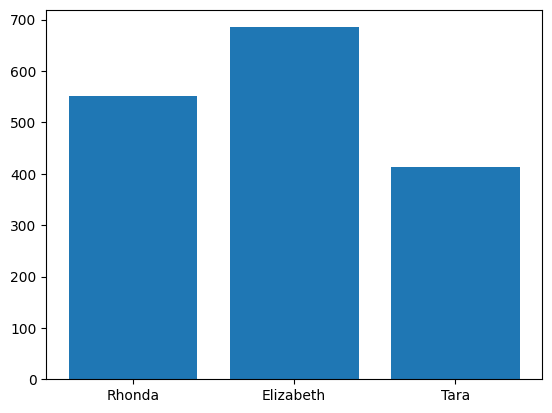

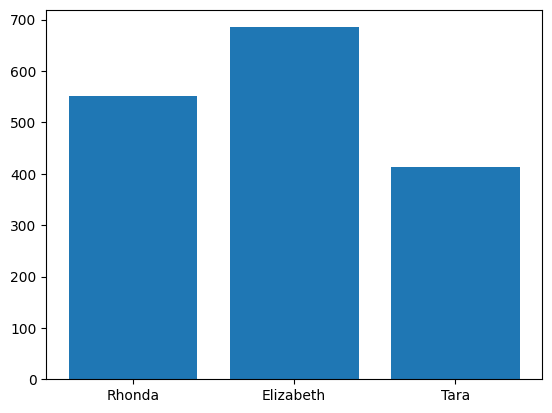

In [11]:
mean_reaction_times = reaction_times.mean(axis=1)  # Calculate the means across the 2nd axis (index 1); columns
plt.bar(participants, mean_reaction_times)
plt.show()

#during lecture
plt.bar(participants, reaction_times.mean(1))
plt.show()

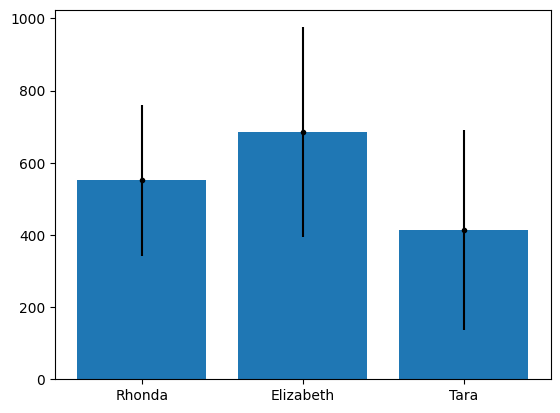

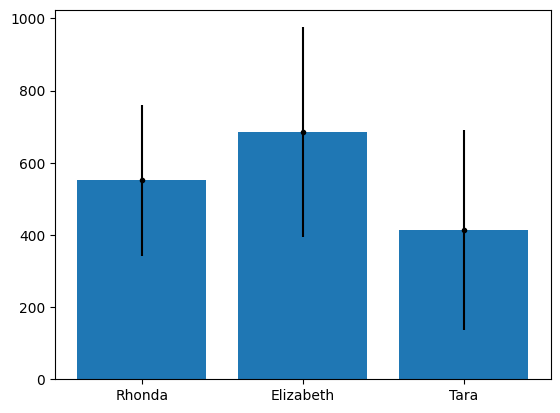

In [17]:
# We can also add another plot on top!
std_reaction_times = reaction_times.std(axis=1)  # Calculate the means across the 2nd axis (index 1); columns
plt.bar(participants, mean_reaction_times)
plt.errorbar(participants, mean_reaction_times, std_reaction_times, fmt='k.') #k. is black lines without lines connecting points on x-axis
plt.show()

#during lecture
plt.bar(participants, reaction_times.mean(1))
plt.errorbar(participants, reaction_times.mean(1), reaction_times.std(1), fmt='k.')
plt.show()

Now, let's give `seaborn` a try!

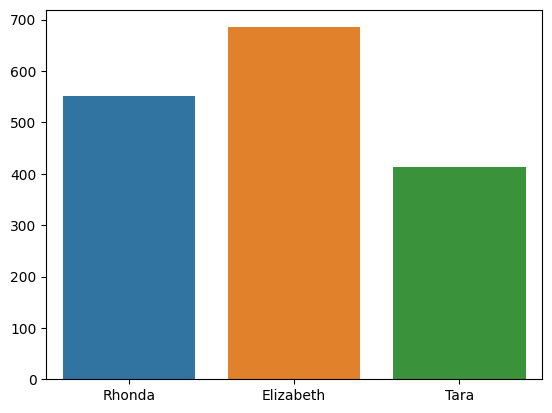

In [23]:
import seaborn as sns
from numpy import matlib

# It can do some of the same things as matplotlib
sns.barplot(x=participants, y=mean_reaction_times)
plt.show()


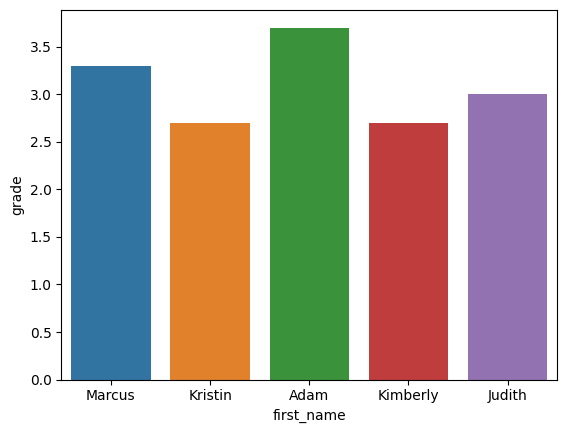

In [24]:
# But in some ways, when working with DataFrames, seaborn becomes much nicer!
sns.barplot(x='first_name', y='grade', data=students) #students is a dataframe
plt.show()  # Hey, that's still matplotlib!

Unfortunately, it's not so great at working with arrays -- so make sure your data is in the right format!

The `plotnine` actually *only* works with DataFrames, but it provides much more freedom when constructing your plots:

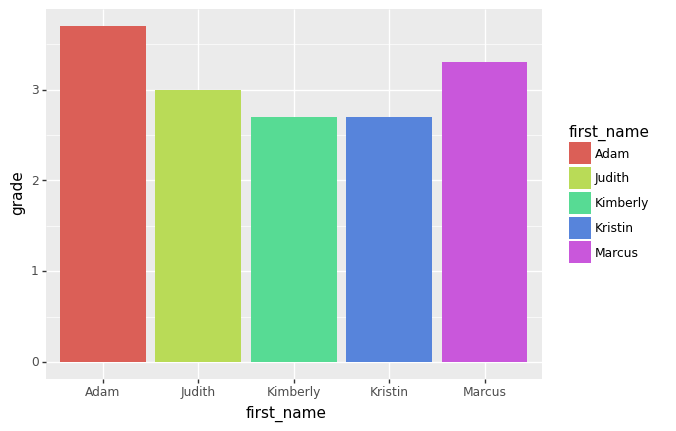

In [31]:
import plotnine as gg
from plotnine import ggplot

plot = (
    ggplot(data=students) + #data is data source
    gg.aes(x='first_name', y='grade', fill="first_name") + #x and y are visual properties in your plot. fill colors
    gg.geom_col() #a geom is a visual element. col for columns
)
plot.draw()
plt.show()

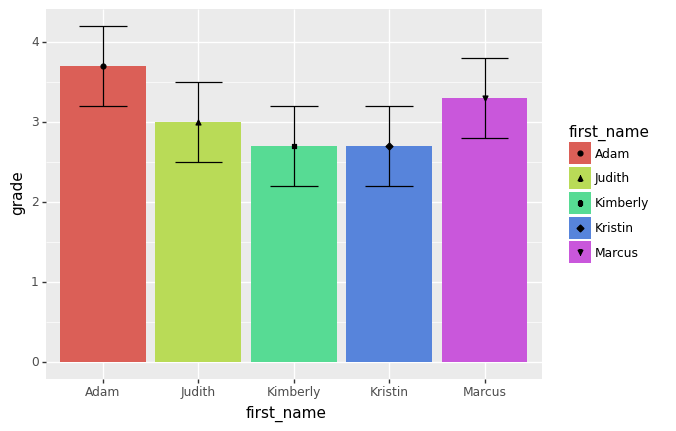

In [35]:
# Let's upgrade that a bit!
students['min_grade'] = students['grade'] - 0.5
students['max_grade'] = students['grade'] + 0.5
plot = (
    ggplot(data=students) +
    gg.aes(x='first_name', y='grade') + #specified for everything. 
    gg.geom_col(gg.aes(fill='first_name')) + #aestetics only specified for the columns
    gg.geom_errorbar(gg.aes(ymin='min_grade', ymax='max_grade')) + #aestetics only specified for the errorbars
    gg.geom_point(gg.aes(shape="first_name")) #shape of point is dependent on name. 
)
plot.draw()
plt.show()

## Now... let's practice!

You can choose one of two sets of exercises (or, of course, both):

- `exercises_seaborn`, which contains `seaborn` exercises, along with some `matplotlib` ways in which you can manipulate your `seaborn` plots after you made them;
- `exercises_ggplot`, which contains `plotnine` exercises, using mostly its own ways to further manipulate plots.